# WIP-Prototype: gamma

| Properties      | Data    |
|---------------|-----------|
| *Labels* | `['BENIGN', 'DDoS']` |
| *Normalization* | `Min-Max` |
| *Sample Size* | `10.000`|
| *Adversarial Attack* | `CW` |
| *Explanations* | `SHAP` |
| *Detector* | `Detect adversarial samples from the explanations of the penultimate layer` |


**Idea: Use robust features to predict adversarial attacks! [(Related Paper)](https://proceedings.neurips.cc/paper/2019/hash/e2c420d928d4bf8ce0ff2ec19b371514-Abstract.html)**

---

In [2]:
# To import modules from the functions directory
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

## Data Preprocessing

In [ ]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

encoding_type = 0 # binary encoding
norm_type = 0 # min-max normalization
label_names = ['BENIGN', 'DDoS'] # labels to include
sample_size = 1000 # sample size for each label -> 2 x sample_size = total samples

dataset = dp.build_dataset(label_names)

normalizer, zero_columns = dp.generate_normalizer(dataset, norm_type)

feature_df, label_df, used_indices = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=sample_size, random_sample_state=42)
print(label_df.value_counts()) # -> will first show [0, 1] then [1, 0] if label number is equal

-- Building CICIDS2017 dataset --
--- Combining all CICIDS2017 files ---
Wednesday-workingHours.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
--- Removing NaN and Infinity values ---
Removing 1358 Rows with NaN values
Removing 1509 Rows with Infinity values
--- Extracting labels ---
 Label
BENIGN    2271320
DDoS       128025
Name: count, dtype: int64
-- Generating normalizer --
--- Splitting labels and features ---
Zero Columns: [' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (2000, 79)
--- Splittin

## Split Data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1600, 70) (400, 70) (1600, 2) (400, 2)


## Create IDS

In [10]:
import functions.intrusion_detection_system as ids
import importlib
importlib.reload(ids)

# build ids with complete dataset
ids_model = ids.build_intrusion_detection_system(X_train, y_train, X_test, y_test)

Epoch 1/10


2025-03-12 13:45:12.058015: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6758 - loss: 0.6652 - val_accuracy: 0.8375 - val_loss: 0.6313
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8486 - loss: 0.6037 - val_accuracy: 0.8313 - val_loss: 0.5662
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8732 - loss: 0.5251 - val_accuracy: 0.9000 - val_loss: 0.4808
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9270 - loss: 0.4326 - val_accuracy: 0.9406 - val_loss: 0.3841
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9589 - loss: 0.3335 - val_accuracy: 0.9656 - val_loss: 0.2842
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9747 - loss: 0.2391 - val_accuracy: 0.9656 - val_loss: 0.1994
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9757 - loss: 0.1603 - val_accuracy: 0.9656 - val_loss: 0.1445
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9797 - loss: 0.1101 - val_accuracy: 0.9656 - val_loss: 0.1135
Ep

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
(1600, 10)
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/home/felix/Documents/Uni/Master Arbeit/Python/xai-assisted-intrusion-detection-system/.env/lib64/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_12']
Received: inputs=Tensor(shape=(32, 70))
  warnings.warn(msg)
2025-03-12 13:45:52.677291: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Global Accuracy: 97.00%
              precision    recall  f1-score   support

      BENIGN       1.00      0.94      0.97       199
      ATTACK       0.94      1.00      0.97       201

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

(1600, 10)


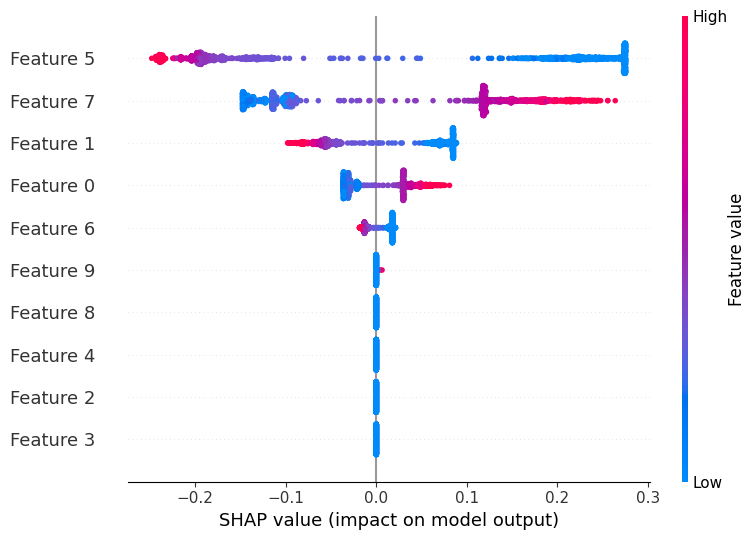

In [ ]:
import tensorflow
import keras
import numpy as np
import shap
from sklearn.metrics import classification_report, accuracy_score

# ids_model.summary()

# After model training:
penultimate_layer_model = keras.Model(
    inputs=ids_model.inputs,  # Note the plural "inputs" instead of "input"
    outputs=ids_model.layers[-2].output
)

# Get the activations for the input data
penult_X_train = penultimate_layer_model.predict(X_train)
print(penult_X_train.shape)


# Define new model with the penultimate activations as input
input_layer = keras.Input(shape=(penult_X_train.shape[1],))
output_layer = ids_model.layers[-1](input_layer)  # Use the original output layer

penultimate_to_output_model = keras.Model(inputs=input_layer, outputs=output_layer)

# --- Evaluation ---
penultimate_activations_test = penultimate_layer_model.predict(X_test)
y_pred = penultimate_to_output_model.predict(penultimate_activations_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test.to_numpy(), axis=1)
# print accuracy
print(f"Global Accuracy: {accuracy_score(y_test_classes, y_pred_classes)*100:.2f}%")
# precision, recall, f1-score
print(classification_report(y_test_classes, y_pred_classes, target_names=y_test.columns, zero_division=0))
# --- End Evaluation ---

# --- SHAP ---
# Use a SHAP explainer on the penultimate layer model
explainer = shap.Explainer(penultimate_to_output_model, penult_X_train)
# Compute SHAP values for the test data
shap_values = explainer(penult_X_train)
shap_values = shap_values[:, :, 0]
print(shap_values.shape)

# Visualize SHAP values
shap.summary_plot(shap_values, penult_X_train)


(1600, 10) (1600, 2)
(801, 10)
(799, 10)
(801, 10) (799, 10)
(1600, 10)


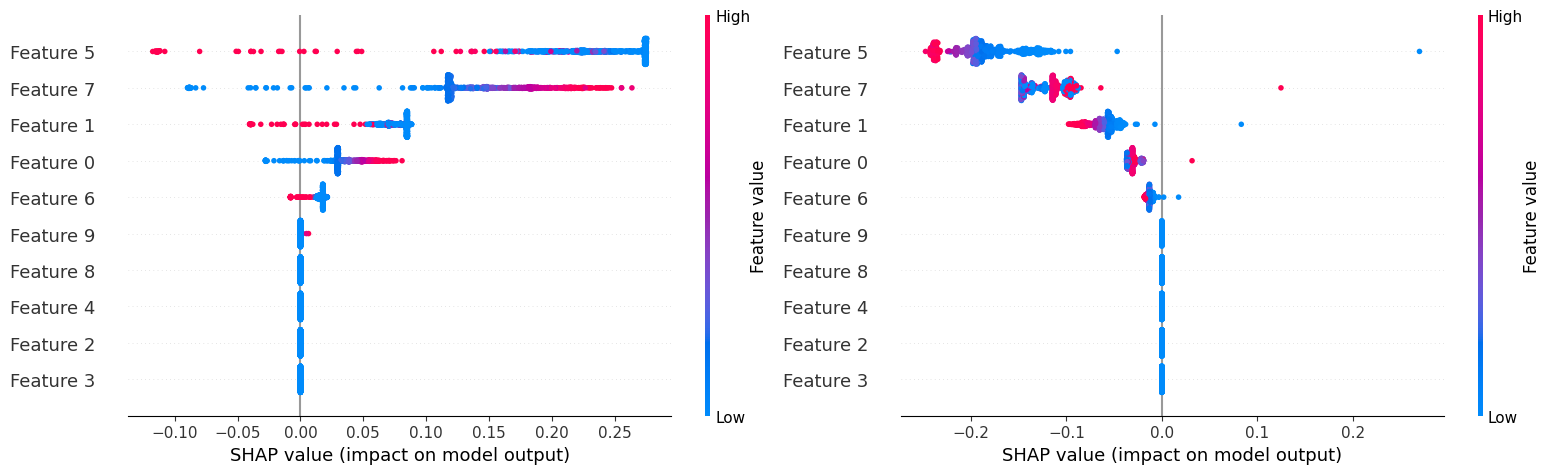

In [ ]:
import functions.explainer as exp
import importlib
importlib.reload(exp)

print(penult_X_train.shape, y_train.shape)
bening_indices = np.where(y_train['BENIGN'] == 1)[0]
attack_indices = np.where(y_train['ATTACK'] == 1)[0]
print(penult_X_train[bening_indices].shape)
print(penult_X_train[attack_indices].shape)

benign_penultimate_activations = penult_X_train[bening_indices]
attack_penultimate_activations = penult_X_train[attack_indices]
benign_shap_values = shap_values[bening_indices]
attack_shap_values = shap_values[attack_indices]
print(benign_shap_values.shape, attack_shap_values.shape)

print(shap_values.shape)
exp.plot_shap_summary_comparison(benign_shap_values, benign_penultimate_activations, attack_shap_values, attack_penultimate_activations)

## Generate Attacks

In [22]:
import functions.attack_generator as ag
import importlib
importlib.reload(ag)

all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

# create smaller dataset
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

import numpy as np
target_label = np.zeros_like(y_train)
target_label[:, 0] = 1 # desired predicted label = [1, 0] = BENIGN
# print(target_label[:3])

import multiprocessing
num_cores = multiprocessing.cpu_count()

X_adv = ag.generate_cw_attacks_parallel(art_model, X_train, target_label=target_label, num_cores=num_cores)
# print(X_adv_fgsm.iloc[:, :3].head(2))

y_pred_adv = ag.evaluate_art_model(art_model, X_adv, y_train)
print(y_pred_adv.shape)

(1600, 70) (400, 70) (1600, 2) (400, 2)
Running attack using 12 CPU cores...

Process 16398 is generating adversarial examples for batch of size 133 
Process 16396 is generating adversarial examples for batch of size 133 
Process 16395 is generating adversarial examples for batch of size 133 
Process 16397 is generating adversarial examples for batch of size 133 


Process 16399 is generating adversarial examples for batch of size 133 

Process 16401 is generating adversarial examples for batch of size 133 
Process 16400 is generating adversarial examples for batch of size 133 

Process 16402 is generating adversarial examples for batch of size 133 
Process 16403 is generating adversarial examples for batch of size 133 

Process 16405 is generating adversarial examples for batch of size 133 
Process 16404 is generating adversarial examples for batch of size 133 




Process 16407 is generating adversarial examples for batch of size 137 





C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/137 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/133 [00:00<?, ?it/s]

Accuracy: 66.56%
              precision    recall  f1-score   support

      BENIGN       0.60      1.00      0.75       801
      ATTACK       1.00      0.33      0.50       799

   micro avg       0.67      0.67      0.67      1600
   macro avg       0.80      0.67      0.62      1600
weighted avg       0.80      0.67      0.62      1600
 samples avg       0.67      0.67      0.67      1600

Confusion Matrix: Positive == BENIGN
TN: 264, FP: 535, FN: 0, TP: 801
(1600, 2)


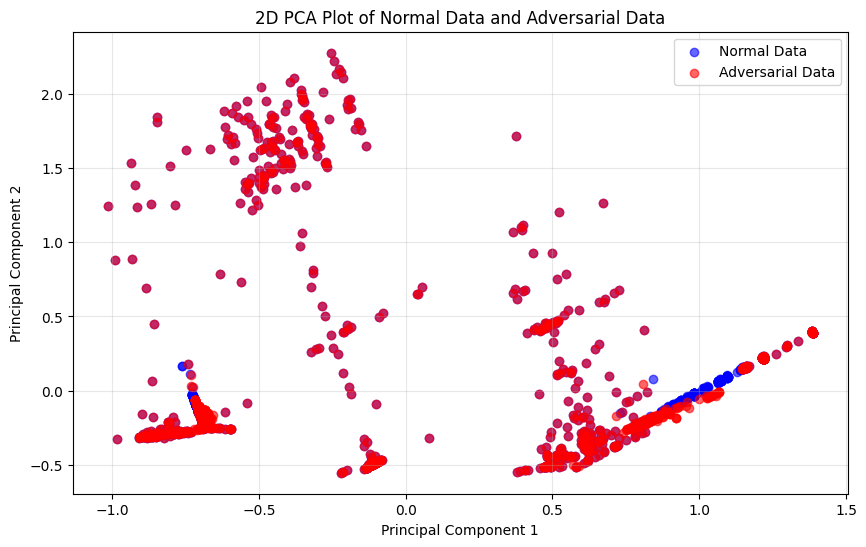

In [23]:
import functions.visualizer as visualizer
import importlib
importlib.reload(visualizer)

visualizer.visualize_data_distribution(X_train, 'Normal Data', X_adv, 'Adversarial Data')

## Explainer

### Penultimate Layer

In [25]:
penultimate_activations_adv = penultimate_layer_model.predict(X_adv)

# --- Evaluation ---
y_pred = penultimate_to_output_model.predict(penultimate_activations_adv)
y_pred_classes = np.argmax(y_pred, axis=1)
y_train_classes = np.argmax(y_train.to_numpy(), axis=1)
# print accuracy
print(f"Global Accuracy: {accuracy_score(y_train_classes, y_pred_classes)*100:.2f}%")
# precision, recall, f1-score
print(classification_report(y_train_classes, y_pred_classes, target_names=y_test.columns, zero_division=0))
# --- End Evaluation ---

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step
Global Accuracy: 66.56%
              precision    recall  f1-score   support

      BENIGN       0.60      1.00      0.75       801
      ATTACK       1.00      0.33      0.50       799

    accuracy                           0.67      1600
   macro avg       0.80      0.67      0.62      1600
weighted avg       0.80      0.67      0.62      1600



In [ ]:
import functions.explainer as exp
importlib.reload(exp)

# Use a SHAP explainer on the penultimate layer model
penultimate_explainer = shap.Explainer(penultimate_to_output_model, penult_X_train) # == X_train
# Compute SHAP values for the test data
shap_values_penulti = penultimate_explainer(penult_X_train)
shap_values_penulti = shap_values_penulti[:, :, 0]
print(shap_values_penulti.shape)

(1600, 10)


In [31]:
shap_values_penulti_adv = penultimate_explainer(penultimate_activations_adv)
shap_values_penulti_adv = shap_values_penulti_adv[:, :, 0]
print(shap_values_penulti_adv.shape)

(1600, 10)


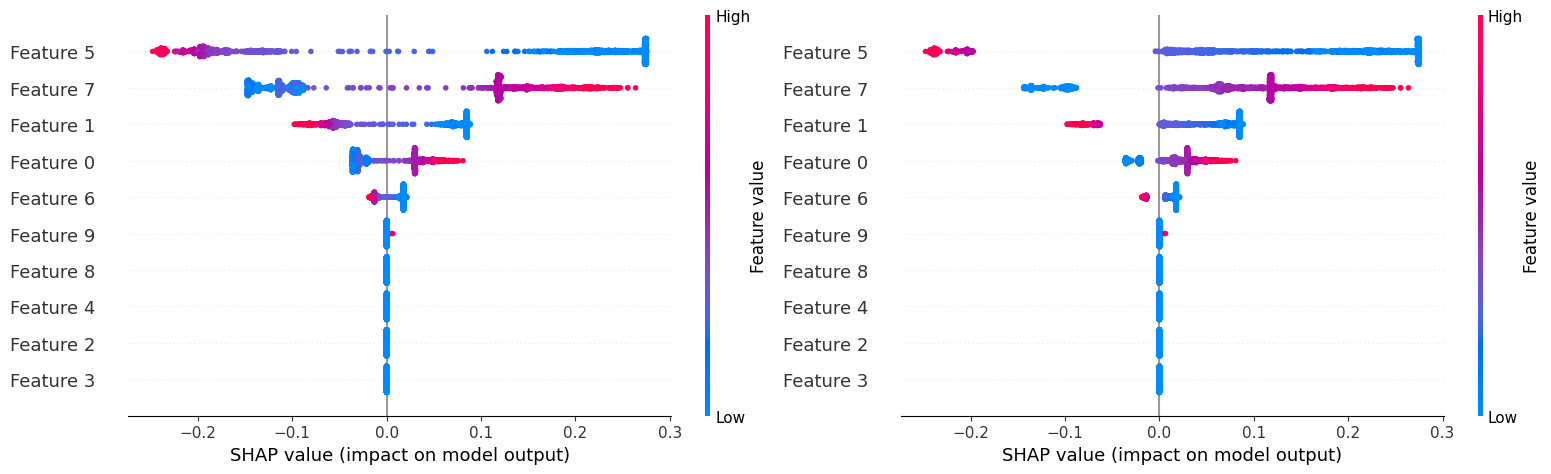

In [ ]:
exp.plot_shap_summary_comparison(shap_values_penulti, penult_X_train, shap_values_penulti_adv, penultimate_activations_adv)

In [ ]:
import pandas as pd

shap_values_penulti_df = pd.DataFrame(shap_values_penulti.values)
shap_values_penulti_adv_df = pd.DataFrame(shap_values_penulti_adv.values)

In [ ]:
visualizer.visualize_data_distribution(shap_values_penulti_df, 'Normal Explanations', shap_values_penulti_adv_df, 'Adversarial Explanations')

## Detector

In [ ]:
import functions.detector as det
import importlib
importlib.reload(det)

# create dataframe
class_samples = {
    'BENIGN': shap_values_penulti_df,
    'ADVERSARIAL': shap_values_penulti_adv_df,
}
X, y = det.build_detector_dataset(class_samples)
print(X.shape, y.shape)

# split data
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)
print(X_train_det.shape, X_test_det.shape, y_train_det.shape, y_test_det.shape)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det)

(3200, 10) (3200, 2)
(2880, 10) (320, 10) (2880, 2) (320, 2)
Epoch 1/10


2025-03-12 14:17:41.765770: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5959 - loss: 0.6904 - val_accuracy: 0.6806 - val_loss: 0.6805
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6541 - loss: 0.6804 - val_accuracy: 0.6806 - val_loss: 0.6631
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6534 - loss: 0.6675 - val_accuracy: 0.6806 - val_loss: 0.6440
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6611 - loss: 0.6556 - val_accuracy: 0.6806 - val_loss: 0.6287
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6597 - loss: 0.6483 - val_accuracy: 0.6806 - val_loss: 0.6203
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6620 - loss: 0.6505 - val_accuracy: 0.6806 - val_loss: 0.6145
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6610 - loss: 0.6424 - val_accuracy: 0.6806 - val_loss: 0.6091
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6597 - loss: 0.6406 - val_accuracy: 0.6806 - val_loss: 0.6037
Ep

### Comparator - Normal Detector: Based on Raw Data

In [ ]:
class_samples = {
    'BENIGN': X_train,
    'ADVERSARIAL': X_adv,
}
X, y = det.build_detector_dataset(class_samples)
print(X.shape, y.shape)

X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)
print(X_train_det.shape, X_test_det.shape, y_train_det.shape, y_test_det.shape)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det)

NameError: name 'det' is not defined

---
## Test Process

In [53]:
print(X_test.shape)

(800, 70)


### Generate Attacks

In [54]:
X_test_adv = ag.generate_fgsm_attacks(art_model, X_test)

Adversarial FGSM examples generated. Shape: (800, 70)


### Generate Explanations

In [ ]:
X_test_adv_shap_values_df = exp.generate_shap_values(explainer, X_test_adv)
X_test_shap_values_df = exp.generate_shap_values(explainer, X_test)

PermutationExplainer explainer: 801it [00:49, 12.77it/s]                         
PermutationExplainer explainer: 801it [00:53, 12.15it/s]                         


### Generate Datasets

In [ ]:
class_samples = {
    'BENIGN': X_test_shap_values_df,
    'ADVERSARIAL': X_test_adv_shap_values_df,
}
X, y = det.build_detector_dataset(class_samples)

### Preprocess Data

In [57]:
# print(np.max(X))
# print(np.min(X))
# X = normalizer.transform(X)
# print(np.max(X))
# print(np.min(X))

### Shuffle Data & Predict

In [58]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=187)

y_pred = detector.predict(X)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


### Evaluate

In [59]:
det.evaluate_model(y_pred, y)

Global Accuracy: 99.69%
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00       800
 ADVERSARIAL       1.00      1.00      1.00       800

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

True Negative Rate: 99.62%
False Positive Rate: 0.38%
True Positive Rate: 99.75%
False Negative Rate: 0.25%


---
## Additional Evaluation - New Samples

In [60]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

X_eval, y_eval = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=500, random_sample_state=17)
print(y_eval.value_counts())

-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (1000, 79)
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Normalizing features using MinMaxScaler ---
BENIGN  ATTACK
False   True      500
True    False     500
Name: count, dtype: int64


In [ ]:
X_adv_fgsm_eval = ag.generate_fgsm_attacks(art_model, X_eval)
print(X_adv_fgsm_eval.iloc[:, :3].head(2))

ag.evaluate_art_model(art_model, X_adv_fgsm_eval, y_eval)

Adversarial FGSM examples generated. Shape: (1000, 70)
   Destination Port  Flow Duration  Total Fwd Packets
0          0.101221            0.0           0.100018
1          0.000000            0.0           0.000000
Accuracy: 0.177
              precision    recall  f1-score   support

      BENIGN       0.22      0.25      0.24       500
      ATTACK       0.12      0.10      0.11       500

   micro avg       0.18      0.18      0.18      1000
   macro avg       0.17      0.18      0.17      1000
weighted avg       0.17      0.18      0.17      1000
 samples avg       0.18      0.18      0.18      1000

Confusion Matrix: Positive == BENIGN
TN: 50, FP: 450, FN: 373, TP: 127


0.177

In [ ]:
X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_fgsm_eval)
X_eval_shap_values_df = exp.generate_shap_values(explainer, X_eval)

PermutationExplainer explainer: 1001it [00:57, 14.61it/s]                          
PermutationExplainer explainer: 1001it [01:03, 13.27it/s]                          


In [ ]:
class_samples = {
    'BENIGN': X_eval_shap_values_df,
    'ADVERSARIAL': X_eval_adv_shap_values_df,
}
X_eval_detector, y_eval_detector = det.build_detector_dataset(class_samples)print(X_eval_detector.shape, y_eval_detector.shape)

(2000, 70) (2000, 2)


In [64]:
from sklearn.utils import shuffle

X_eval_detector, y_eval_detector = shuffle(X_eval_detector, y_eval_detector, random_state=187)

y_pred_eval_detector = detector.predict(X_eval_detector)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [65]:
det.evaluate_model(y_pred_eval_detector, y_eval_detector)

Global Accuracy: 99.60%
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      1000
 ADVERSARIAL       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

True Negative Rate: 99.60%
False Positive Rate: 0.40%
True Positive Rate: 99.60%
False Negative Rate: 0.40%
